In [51]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

to test out, try with just file11

In [2]:
df_11 = pd.read_csv('file11_output.csv')
df_11.set_index('filename', inplace=True)
df_11

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,feature 11,feature 12,feature 13
filename,,,,,,,,,,,,,
/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X320002 (Month 4).mp3,-304.478279,88.447660,13.372644,-14.371087,-20.476223,-5.530841,-10.048357,-11.329163,0.460247,1.109774,-6.931044,-8.370006,-10.980081
/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X320061 (Month 8).mp3,-265.435496,119.166720,-9.940413,8.493930,-7.161556,-3.826830,-12.517904,-9.150667,-10.404795,3.559838,-5.569252,4.294892,-2.244846
/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X220724 (Month 12).mp3,-224.374014,74.995887,15.161741,-10.353019,-1.856379,-11.181138,-12.276773,4.578007,0.131649,4.270914,-11.819132,9.372124,-14.751224
/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X320002 (Month 16).mp3,-388.115274,56.508211,-5.974976,13.921460,-9.220643,9.839543,-22.855285,8.000577,-7.481471,-1.950874,-3.540754,-8.812328,-1.567006
/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X320057 (Month 24).mp3,-281.365767,138.678200,-22.024852,1.604364,13.955378,-7.305527,-23.003823,-11.874514,-6.071951,5.841100,-4.750817,-8.474152,-7.495316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X320069 (Month 16).mp3,-310.347221,55.584294,-24.525610,33.617985,-30.567329,4.958434,-11.993497,5.630660,1.874447,1.175138,-8.014817,-10.717991,1.824008
/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X320002 (Contact 5).mp3,-286.416424,109.560426,-112.206726,35.341385,23.256132,-37.679942,-15.079957,-28.191787,-11.059469,-15.158319,-31.059836,5.981704,-9.242269
/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X220863 (Baseline).mp3,-297.936055,96.280620,14.932877,-12.746752,11.925566,-9.392005,-15.027607,-14.191127,-15.843329,0.069010,-4.264338,-2.336939,-8.304114


Note that there are 771 rows in df_11 while file 11 actually had 1250 files. So either a lot of these files don't have coughs in them, and/or the model used to extract coughs are not detecting all of the coughs present. 

In [3]:
def plot_cough_clusters(df):
    scalar = StandardScaler()
    features_scaled = scalar.fit_transform(df)
    kmeans = KMeans(n_clusters=2, random_state=42)
    labels = kmeans.fit_predict(features_scaled)

    #umap for dimension reduction and plotting
    reducer = umap.UMAP(random_state=42)
    embedding = reducer.fit_transform(features_scaled)

    # Plotting
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=embedding[:, 0],
        y=embedding[:, 1],
        hue=labels,
        palette='viridis',
        s=50,
        alpha=0.5
    )
    plt.title('UMAP Projection of Clusters')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.legend(title='Cluster')
    plt.show()


/Users/osiddiqui/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


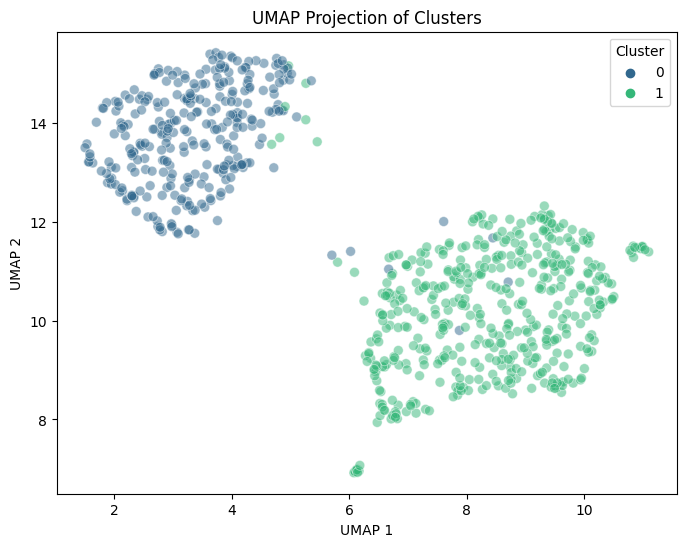

In [4]:
plot_cough_clusters(df_11)

Now let's try with all of the audio files that was deemed to contain coughs

In [5]:
df = pd.concat([pd.read_csv(f"file{i}_output.csv") for i in range(1,13)], ignore_index=True)
df.set_index('filename', inplace=True)
df

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,feature 11,feature 12,feature 13
filename,,,,,,,,,,,,,
/n/home02/ematsumoto/cough_mp3_full/Files_1_mp3/X120013 (Contact 77).mp3,-693.272743,56.136206,-20.944638,2.533271,-1.240830,-7.241315,-0.683520,-8.498120,1.626352,3.820010,-5.924560,-0.154448,-0.016139
/n/home02/ematsumoto/cough_mp3_full/Files_1_mp3/X120022 (Contact 10).mp3,-338.768490,163.554312,-68.727396,1.032950,-12.132019,-36.997744,-10.567027,-22.262195,2.786168,0.403076,-22.783877,3.285068,0.013780
/n/home02/ematsumoto/cough_mp3_full/Files_1_mp3/X120024 (Contact 49).mp3,-479.763656,125.030033,-33.504177,-3.623849,-6.974296,-11.350746,-7.108445,-22.083424,6.216165,3.036253,-17.186462,2.130369,-4.055250
/n/home02/ematsumoto/cough_mp3_full/Files_1_mp3/X120052 (Contact 38).mp3,-446.727986,121.681218,-54.218771,14.310027,-20.903192,-31.306375,3.775018,-23.706667,0.851762,4.275157,-15.770597,15.544062,5.371586
/n/home02/ematsumoto/cough_mp3_full/Files_1_mp3/X120001 (Contact 5).mp3,-505.826945,74.962905,-29.951639,-0.032738,15.226045,-10.487250,-18.735013,-15.953996,-5.076121,-1.891757,-4.436150,0.413986,-1.978785
...,...,...,...,...,...,...,...,...,...,...,...,...,...
/n/home02/ematsumoto/cough_mp3_full/Files_12_mp3/X330147 (Contact 3).mp3,-382.744000,122.915886,-50.575222,2.216145,-24.130911,-40.407618,-2.674205,-20.360639,-11.318923,3.574128,-7.467132,4.532711,-0.887916
/n/home02/ematsumoto/cough_mp3_full/Files_12_mp3/X320193 (Month 8).mp3,-272.511462,96.818839,-29.942318,-26.378298,-22.498569,18.041123,-15.944133,-13.209522,9.641731,5.064521,-7.230937,-6.307503,-10.058792
/n/home02/ematsumoto/cough_mp3_full/Files_12_mp3/X330112 (Contact 9).mp3,-614.105741,97.519413,-25.634834,5.997570,-6.059799,-12.313932,3.550610,-10.592991,1.222639,0.895897,-8.376558,9.216857,0.235194


/Users/osiddiqui/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


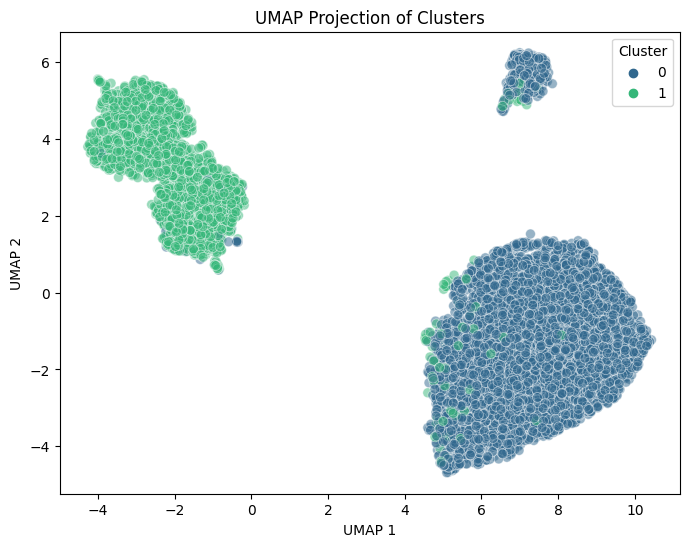

In [6]:
plot_cough_clusters(df)

## Analysis

Now we want to test what exactly our clusters are capturing, to ensure that it is not clustering on an unintended characteristic like the gender of the patient. To do so, I will randomly subsample 10 coughs from each cluster and evaluate them qualitatively to see if there is an unintended feature. 

In [7]:
scalar = StandardScaler()
features_scaled = scalar.fit_transform(df)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(features_scaled)

In [8]:
df_with_clusters = df.copy()

In [9]:
df_with_clusters['label'] = labels

In [10]:
df_with_clusters.tail()

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,feature 11,feature 12,feature 13,label
filename,,,,,,,,,,,,,,
/n/home02/ematsumoto/cough_mp3_full/Files_12_mp3/X330147 (Contact 3).mp3,-382.744000,122.915886,-50.575222,2.216145,-24.130911,-40.407618,-2.674205,-20.360639,-11.318923,3.574128,-7.467132,4.532711,-0.887916,0
/n/home02/ematsumoto/cough_mp3_full/Files_12_mp3/X320193 (Month 8).mp3,-272.511462,96.818839,-29.942318,-26.378298,-22.498569,18.041123,-15.944133,-13.209522,9.641731,5.064521,-7.230937,-6.307503,-10.058792,1
/n/home02/ematsumoto/cough_mp3_full/Files_12_mp3/X330112 (Contact 9).mp3,-614.105741,97.519413,-25.634834,5.997570,-6.059799,-12.313932,3.550610,-10.592991,1.222639,0.895897,-8.376558,9.216857,0.235194,0
/n/home02/ematsumoto/cough_mp3_full/Files_12_mp3/X320186 (Month 8).mp3,-190.314841,88.150642,-18.887979,-3.693336,-7.826633,-1.460541,-19.921997,-11.797921,-11.640575,0.947988,-13.141748,-0.215722,-9.348531,1
/n/home02/ematsumoto/cough_mp3_full/Files_12_mp3/X320124 (Month 12).mp3,-231.325335,91.459487,-34.446818,1.539661,-11.103236,9.815912,-21.530873,-12.427305,-19.700266,11.262282,-10.001585,-2.255810,-8.975088,1


In [11]:
# Sample 1: Random 10 rows where cluster == 0
sample1 = df_with_clusters[df_with_clusters['label'] == 0].sample(n=10, random_state=None)
indexes_sample1 = sample1.index.tolist()

# Sample 2: Another random 10 rows where cluster == 1
sample2 = df_with_clusters[df_with_clusters['label'] == 1].sample(n=10, random_state=None)
indexes_sample2 = sample2.index.tolist()

display("Sample Indexes from cluster 0:", indexes_sample1)
display("Sample Indexes from cluster 1:", indexes_sample2)

'Sample Indexes from cluster 0:'

['/n/home02/ematsumoto/cough_mp3_full/Files_7_mp3/X220023 (Contact 14).mp3',
 '/n/home02/ematsumoto/cough_mp3_full/Files_2_mp3/X120096 (Contact 45).mp3',
 '/n/home02/ematsumoto/cough_mp3_full/Files_2_mp3/X120160 (Contact 20).mp3',
 '/n/home02/ematsumoto/cough_mp3_full/Files_1_mp3/X120023 (Contact 71).mp3',
 '/n/home02/ematsumoto/cough_mp3_full/Files_2_mp3/X120093 (Contact 20).mp3',
 '/n/home02/ematsumoto/cough_mp3_full/Files_1_mp3/X120031 (Contact 7).mp3',
 '/n/home02/ematsumoto/cough_mp3_full/Files_2_mp3/X120078 (Contact 40).mp3',
 '/n/home02/ematsumoto/cough_mp3_full/Files_9_mp3/X220219 (Contact 23).mp3',
 '/n/home02/ematsumoto/cough_mp3_full/Files_1_mp3/X120071 (Contact 21).mp3',
 '/n/home02/ematsumoto/cough_mp3_full/Files_2_mp3/X120179 (Contact 65).mp3']

'Sample Indexes from cluster 1:'

['/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X320022 (Month 12).mp3',
 '/n/home02/ematsumoto/cough_mp3_full/Files_6_mp3/X120794 (Month 12).mp3',
 '/n/home02/ematsumoto/cough_mp3_full/Files_3_mp3/X120218 (Month 24).mp3',
 '/n/home02/ematsumoto/cough_mp3_full/Files_6_mp3/X120850 (Contact 15).mp3',
 '/n/home02/ematsumoto/cough_mp3_full/Files_12_mp3/X320170 (Month 8).mp3',
 '/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X320091 (Month 16).mp3',
 '/n/home02/ematsumoto/cough_mp3_full/Files_5_mp3/X120612 (Month 16).mp3',
 '/n/home02/ematsumoto/cough_mp3_full/Files_4_mp3/X120366 (Month 20).mp3',
 '/n/home02/ematsumoto/cough_mp3_full/Files_5_mp3/X120543 (Month 12).mp3',
 '/n/home02/ematsumoto/cough_mp3_full/Files_12_mp3/X320193 (Baseline).mp3']

#### What we are hearing in the samples

### Observations

Overall, it does not seem like Age or Gender are being captured by the clustering algorithm to assign labels!

In [13]:
demographic_df = pd.read_excel('Harvard Capstone Audio.xlsx')

In [17]:
demographic_df.head()

,XID,2.a Age of participant in years:,3: Gender of participant:
0,X120001,35.0,Female
1,X120002,45.0,Male
2,X120003,28.0,Female
3,X120004,27.0,Male
4,X120005,37.0,Female


In [15]:
# Create a column for the 
df_with_clusters['patient_id'] = df_with_clusters.index.to_series().str.extract(r'(X\d+)')

In [19]:
df_with_clusters = df_with_clusters.merge(demographic_df, left_on='patient_id', right_on='XID', how='left')

In [21]:
df_with_clusters = df_with_clusters.drop(columns=['XID'])
df_with_clusters.head()

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,feature 11,feature 12,feature 13,label,patient_id,2.a Age of participant in years:,3: Gender of participant:
0,-693.272743,56.136206,-20.944638,2.533271,-1.240830,-7.241315,-0.683520,-8.498120,1.626352,3.820010,-5.924560,-0.154448,-0.016139,0,X120013,32.0,Male
1,-338.768490,163.554312,-68.727396,1.032950,-12.132019,-36.997744,-10.567027,-22.262195,2.786168,0.403076,-22.783877,3.285068,0.013780,0,X120022,20.0,Female
2,-479.763656,125.030033,-33.504177,-3.623849,-6.974296,-11.350746,-7.108445,-22.083424,6.216165,3.036253,-17.186462,2.130369,-4.055250,0,X120024,34.0,Female
3,-446.727986,121.681218,-54.218771,14.310027,-20.903192,-31.306375,3.775018,-23.706667,0.851762,4.275157,-15.770597,15.544062,5.371586,0,X120052,42.0,Female
4,-505.826945,74.962905,-29.951639,-0.032738,15.226045,-10.487250,-18.735013,-15.953996,-5.076121,-1.891757,-4.436150,0.413986,-1.978785,0,X120001,35.0,Female


/Users/osiddiqui/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


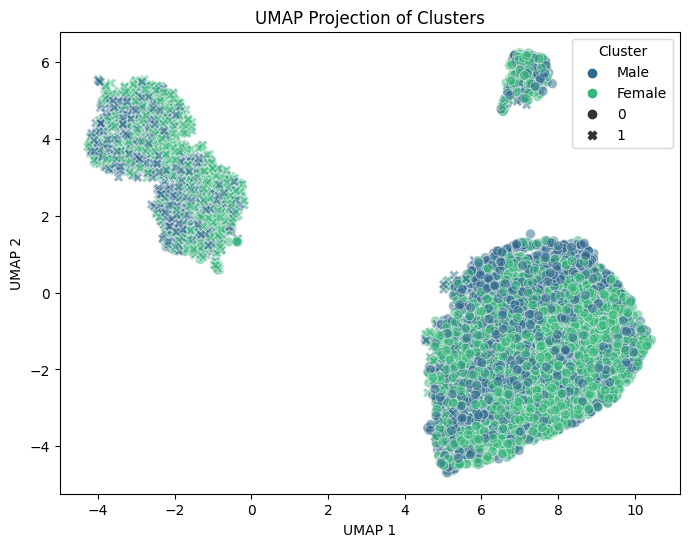

In [29]:
plotting_features = ['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5',
       'feature 6', 'feature 7', 'feature 8', 'feature 9', 'feature 10',
       'feature 11', 'feature 12', 'feature 13']
scalar = StandardScaler()
features_scaled = scalar.fit_transform(df_with_clusters[plotting_features])
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(features_scaled)

#umap for dimension reduction and plotting
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(features_scaled)

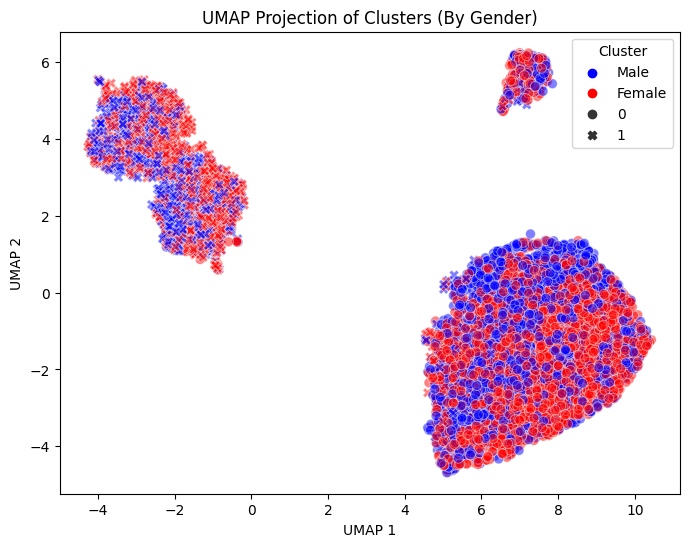

In [60]:
# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=df_with_clusters['3: Gender of participant: '],
    style=labels,
    palette=['blue', 'red'],
    s=50,
    alpha=0.5
)
plt.title('UMAP Projection of Clusters (By Gender)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='Cluster')
#plt.savefig('example3.png')
plt.show()


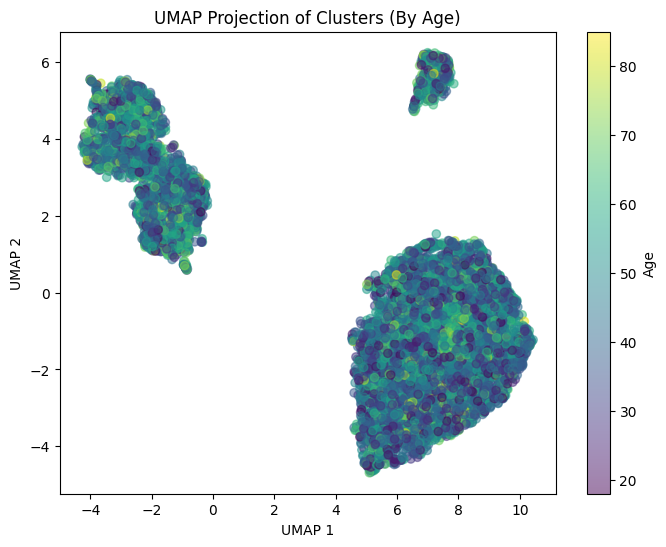

In [61]:
# Plotting
monochrome_blue = LinearSegmentedColormap.from_list("mono_blue", ["#000033", "#ffffff"])
plt.figure(figsize=(8, 6))
plt.scatter(
    x=embedding[:, 0],
    y=embedding[:, 1],
    c=df_with_clusters['2.a Age of participant in years: '],
    cmap='viridis',
    alpha=0.5,
)
plt.colorbar(label='Age')
plt.title('UMAP Projection of Clusters (By Age)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
#plt.savefig('example4.png')
plt.show()

#### Statistical Analysis

Aside from a graphical analysis, we also wanted to ensure that age or gender was not a statistically signifigant predictor of class label. To do this, we used p-testing. 


In [62]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_with_clusters['3: Gender of participant: '], df_with_clusters['label'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square p-value: {p}")

Chi-square p-value: 0.07981895225207125
